In [5]:

import kagglehub
paultimothymooney_chest_xray_pneumonia_path = kagglehub.dataset_download('paultimothymooney/chest-xray-pneumonia')

print('Data source import complete.')


Data source import complete.


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person629_bacteria_2509.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person952_bacteria_2877.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1315_virus_2270.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1392_bacteria_3538.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person475_bacteria_2025.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1288_bacteria_3251.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1005_virus_1688.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person442_virus_900.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person755_bacteria_2659.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person655_bacteria_2547.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [8]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_data_gen=ImageDataGenerator(
    rescale=1./255
)
val_data_gen=ImageDataGenerator(
    rescale=1./255
)

In [9]:
train_data=train_data_gen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
test_data=test_data_gen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)
val_data=val_data_gen.flow_from_directory(
    '/kaggle/input/chest-xray-pneumonia/chest_xray/val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'

)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


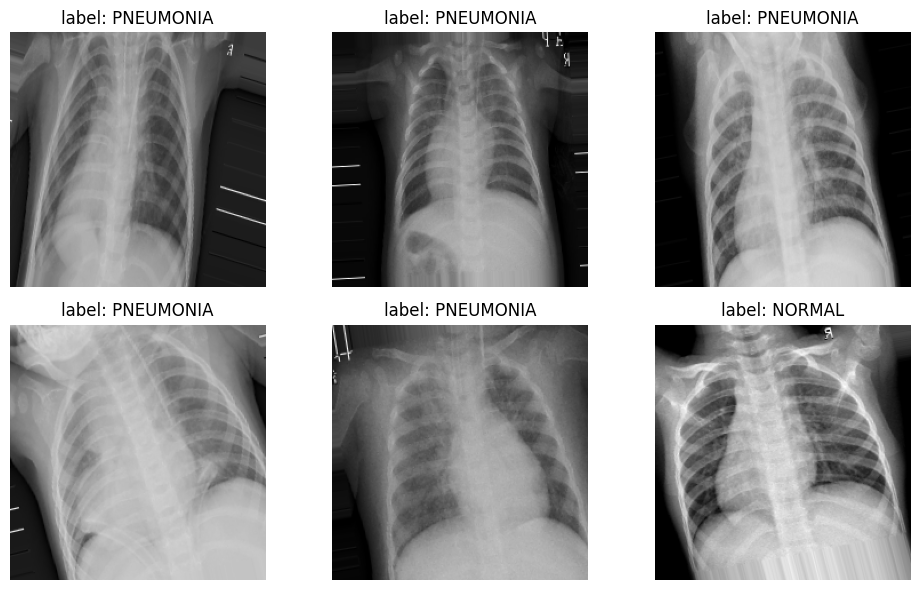

In [10]:
#viewing the first 6 images
image,label=next(train_data)
class_name=list(train_data.class_indices.keys())

plt.figure(figsize=(10,6))
for i in range (6):
    plt.subplot(2,3,i+1)
    plt.imshow(image[i])
    label_index=int(label[i])
    plt.title(f'label: {class_name[label_index]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
callbacks=[
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint('best_model.h5',save_best_only=True)
]

In [12]:
model = Sequential([
    Input(shape=(224, 224, 3)),  # Explicit input layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),
])

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=(['accuracy']))

In [14]:
model.fit(train_data,validation_data=val_data, epochs=10,callbacks=callbacks)

loss,accuracy=model.evaluate(test_data)
print(f'test loss:{loss}')
print(f'accuracy is:{accuracy}')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.7714 - loss: 0.4929

163/163 ━━━━━━━━━━━━━━━━━━━━ 125s 717ms/step - accuracy: 0.7717 - loss: 0.4922 - val_accuracy: 0.6875 - val_loss: 0.6674
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 591ms/step - accuracy: 0.8775 - loss: 0.2891 - val_accuracy: 0.5625 - val_loss: 1.2573
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 601ms/step - accuracy: 0.8941 - loss: 0.2589 - val_accuracy: 0.6875 - val_loss: 1.6378
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 587ms/step - accuracy: 0.9040 - loss: 0.2309 - val_accuracy: 0.6250 - val_loss: 1.2571
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step - accuracy: 0.8387 - loss: 0.4849
test loss:0.5108942985534668
accuracy is:0.8108974099159241
